In [20]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import itertools
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

In [3]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
EWR = df[df['ORIGIN_STATE_ABR'] == 'NJ']

In [4]:
EWR

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25666,1,1,26,6,2019-01-26,UA,758,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,613.0,13.0,907.0,-22.0,0.0,322.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25667,1,1,26,6,2019-01-26,UA,703,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,754.0,-6.0,1032.0,-57.0,0.0,319.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25669,1,1,26,6,2019-01-26,UA,600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1950.0,-10.0,2228.0,-55.0,0.0,314.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25673,1,1,26,6,2019-01-26,UA,204,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,855.0,-5.0,1148.0,-27.0,0.0,302.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25675,1,1,25,5,2019-01-25,UA,2394,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1357.0,-3.0,1702.0,-21.0,0.0,332.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35565,4,12,8,7,2019-12-08,UA,2023,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1259.0,-1.0,1616.0,7.0,0.0,345.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35568,4,12,8,7,2019-12-08,UA,1871,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1903.0,3.0,2227.0,2.0,0.0,337.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
35569,4,12,8,7,2019-12-08,UA,1702,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1059.0,-1.0,1424.0,15.0,0.0,355.0,2454.0,0.0,0.0,15.0,0.0,0.0,False,True,False,3,False,False,True,False,False
35570,4,12,8,7,2019-12-08,UA,1460,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1603.0,3.0,1912.0,-2.0,0.0,341.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


In [5]:
airlines = {'OP_UNIQUE_CARRIER' : {'AS':1, 'UA':2 }}

In [6]:
airline=EWR.replace(airlines,inplace=True)

In [21]:
percentage(EWR)

percentage of cancelled flights 0.7063572149344097
percentage of delay flights 41.41271442986882
percentage of ontime fights 57.88092835519677


3    2868
2    2052
1      35
Name: class, dtype: int64


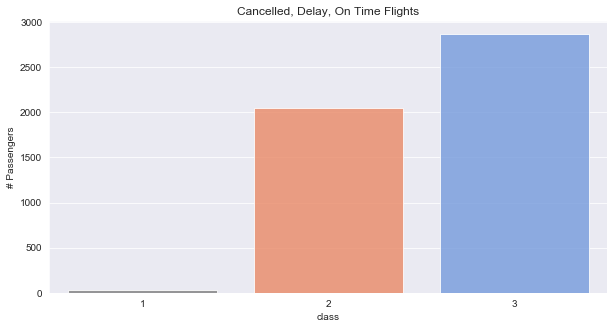

In [22]:
airportgraph(EWR)

In [23]:
X = EWR[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= EWR['class']

[0.01490305 0.02779592 0.03300626 0.02761748 0.00945313 0.03663475
 0.         0.17204376 0.41620505 0.07422164 0.1238251  0.01156554
 0.05272832 0.        ]


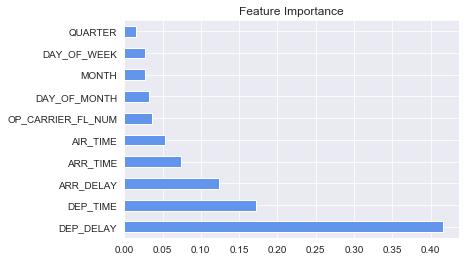

In [24]:
featureimport(X,y)

# Baseline Model

In [31]:
X = EWR[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= EWR['class']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)


In [42]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.335318901641726

In [38]:
datatable(y_test,dummy_pred)

,Micro,Macro,Weighted
Precison,0.325392,0.108464,0.105880
Recall,0.325392,0.333333,0.325392
F1 Score,0.325392,0.163671,0.159772


In [43]:
cm = confusion_matrix(y_test,dummy_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [585   0   0]
 [576   0   0]]


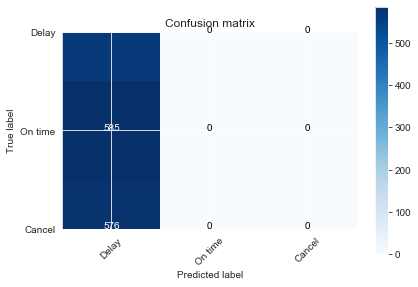

In [44]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [45]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8913422428820453


In [46]:
y_test.value_counts()

2    585
3    576
1    560
Name: class, dtype: int64

In [47]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 454 131]
 [  0  56 520]]


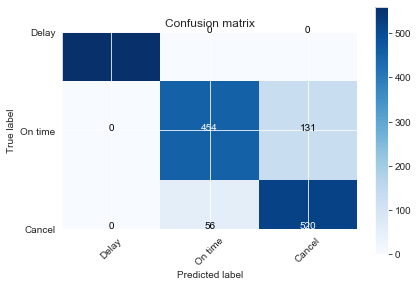

In [48]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [49]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.891342,0.896322,0.895326
Recall,0.891342,0.892949,0.891342
F1 Score,0.891342,0.892273,0.890942


# Hyperparameter Tuning

In [76]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[5,10,25,100,200]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=5)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 25, 100, 200], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
grid_clf_acc.best_params_

{'C': 10, 'penalty': 'l2'}

In [78]:
refclf = LogisticRegression(C=10,penalty='l2')
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [79]:
cm = confusion_matrix(y_test,refpred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 450 135]
 [  0  48 528]]


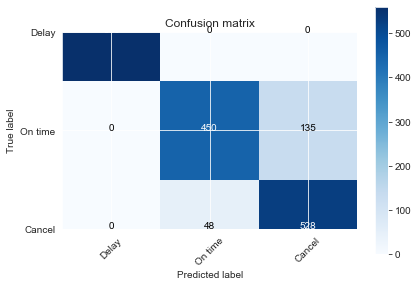

In [80]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [82]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.893666,0.899998,0.899087
Recall,0.893666,0.895299,0.893666
F1 Score,0.893666,0.894442,0.893129


# Hypyerparameter Tuning

In [83]:

rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.9331783846600813

In [84]:
datatable(y_test,test_pred)

,Micro,Macro,Weighted
Precison,0.933178,0.934551,0.933881
Recall,0.933178,0.934090,0.933178
F1 Score,0.933178,0.933945,0.933150


In [125]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [126]:

# Instantiate a GridSearch to tune model
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [127]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [128]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2, n_estimators=100,
                                bootstrap= False,random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [129]:
refined_pred = rfc_ref.predict(X_test)


In [130]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.947705,0.949293,0.948829
Recall,0.947705,0.948478,0.947705
F1 Score,0.947705,0.948292,0.947667
